In [197]:
import numpy as np
import matplotlib.pyplot as plt

In [198]:
np.random.seed(1234)
m = 50
n = 200
X = np.random.randn(2,m)/10

In [199]:
for idx in range(n):
    t = np.random.randn(2,2)
    tmp = t[:, 0:1]/np.linalg.norm(t[:, 0]) + t[:, 1]/np.linalg.norm(t[:, 1:2])/10
    X = np.hstack((X,tmp))

In [200]:
plt.figure()
plt.title('original data')
plt.scatter(X[0,m:], X[1,m:])
plt.scatter(X[0,1:m], X[1,1:m], c = 'r')

In [201]:
H = np.eye(450) - np.ones((450,450))/450

In [202]:
def custom_sdist(X):
    XX = np.dot(X.T, X)
    pdists = np.outer(np.diag(XX), np.ones(XX.shape[1]).T) + np.outer(np.ones(XX.shape[0]), np.diag(XX).T) - 2*XX
    return pdists

In [203]:
sigma = 0.15

In [204]:
def K(X):
    return np.exp(-custom_sdist(X)/(2 * sigma**2))

In [205]:
k = 2

In [206]:
KK = K(X)
KK = H.dot(KK).dot(H)
w,v = np.linalg.eig(KK)
# print(w[:4])
# print(np.max(w))
w_sort = np.argsort(w)[::-1][:k]
wk = np.diag(np.sqrt(w[w_sort]))
# print(w[w_sort])
vk = v[:,w_sort]
Y = wk.dot(vk.T)

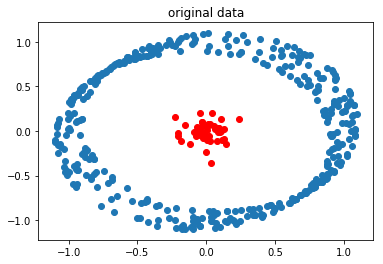

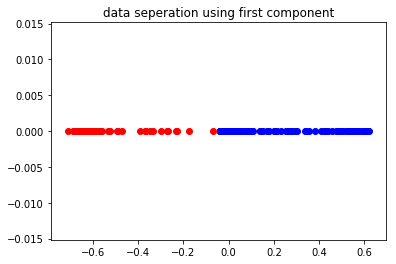

In [207]:
plt.figure()
plt.title('data seperation using first component')
plt.scatter(Y[0,m:], np.zeros(Y[0,m:].size), c = 'b')
plt.scatter(Y[0,1:m], np.zeros(Y[0,1:m].size), c = 'r')
plt.show()